In [1]:
import wavemodule
import matplotlib.pyplot as plt

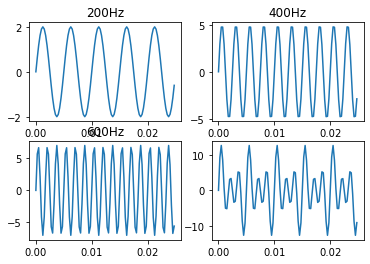

In [28]:
x1, y1 = wavemodule.sin(2, 1, 0, 200, 4000)
x2, y2 = wavemodule.sin(5, 1, 0, 400, 4000)
x3, y3 = wavemodule.sin(7, 1, 0, 600, 4000)
plt.subplot(221)
plt.title("200Hz")
plt.plot(x1[0:100], y1[0:100])

plt.subplot(222)
plt.title("400Hz")
plt.plot(x2[0:100], y2[0:100])

plt.subplot(223)
plt.title("600Hz")
plt.plot(x3[0:100], y3[0:100])

y4 = y1+y2+y3
plt.subplot(224)
plt.plot(x1[0:100], y4[0:100])